In [1]:
pip install gdown

In [2]:
!gdown --fuzzy "https://drive.google.com/file/d/1fBiwas0OutvWk7jnwfM4x9oSosuRAe54/view?usp=sharing"

Downloading...
From (original): https://drive.google.com/uc?id=1fBiwas0OutvWk7jnwfM4x9oSosuRAe54
From (redirected): https://drive.google.com/uc?id=1fBiwas0OutvWk7jnwfM4x9oSosuRAe54&confirm=t&uuid=1b1ef027-96bd-4e68-a41c-0521dbe5a862
To: /content/mri-for-brain-tumor-with-bounding-boxes.zip
100% 139M/139M [00:03<00:00, 35.0MB/s]


In [3]:
!mkdir mri-for-brain-tumor-with-bounding-boxes
!unzip *.zip -d mri-for-brain-tumor-with-bounding-boxes

Streaming output truncated to the last 5000 lines.
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1015.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1016.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1019.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1020.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1022.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1025.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1031.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1032.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1040.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1041.jpg  
  inflating: mri-for-brain-tu

In [ ]:
!pip install -q --upgrade pip
!pip install -q --no-cache-dir torch torchvision torchaudio
!pip install -q seaborn

# Clone YOLOv5 GitHub repository
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -qr requirements.txt  # install

# Import necessary libraries
import torch
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 25.8 MB/s eta 0:00:00


In [ ]:
import os
import shutil

# Dataset directory paths
dataset_dir = '/content/mri-for-brain-tumor-with-bounding-boxes'

# Output directories for YOLOv5
images_train_dir = '/content/yolo_data/images/train'
images_val_dir = '/content/yolo_data/images/val'
labels_train_dir = '/content/yolo_data/labels/train'
labels_val_dir = '/content/yolo_data/labels/val'

# Create directories if they do not exist
os.makedirs(images_train_dir, exist_ok=True)
os.makedirs(images_val_dir, exist_ok=True)
os.makedirs(labels_train_dir, exist_ok=True)
os.makedirs(labels_val_dir, exist_ok=True)

# Classes
classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Function to copy images and labels
def copy_files(src_image_dir, src_label_dir, dest_image_dir, dest_label_dir):
    for filename in os.listdir(src_image_dir):
        src_image_path = os.path.join(src_image_dir, filename)
        src_label_path = os.path.join(src_label_dir, os.path.splitext(filename)[0]+'.txt')
        dest_image_path = os.path.join(dest_image_dir, filename)
        dest_label_path = os.path.join(dest_label_dir, os.path.splitext(filename)[0]+'.txt')

        shutil.copy(src_image_path, dest_image_path)
        if os.path.exists(src_label_path):
            shutil.copy(src_label_path, dest_label_path)
        else:
            # Create an empty label file
            open(dest_label_path, 'a').close()

# Copy files from each class
for class_name in classes:
    # Train
    train_image_dir = os.path.join(dataset_dir, 'Train', class_name, 'images')
    train_label_dir = os.path.join(dataset_dir, 'Train', class_name, 'labels')
    copy_files(train_image_dir, train_label_dir, images_train_dir, labels_train_dir)

    # Val
    val_image_dir = os.path.join(dataset_dir, 'Val', class_name, 'images')
    val_label_dir = os.path.join(dataset_dir, 'Val', class_name, 'labels')
    copy_files(val_image_dir, val_label_dir, images_val_dir, labels_val_dir)

In [ ]:
# Create the data.yaml configuration file for YOLOv5
data_yaml = """
train: ../yolo_data/images/train
val: ../yolo_data/images/val

nc: 4  # Number of classes
names: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
"""

# Save the YAML config file
with open('data.yaml', 'w') as file:
    file.write(data_yaml)

In [ ]:
# Train YOLOv5 on the dataset
!python train.py --img 640 --batch 8 --epochs 10 --data data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
        5/9      2.53G    0.03088    0.01023   0.004621         16        640:  82% 484/593 [01:44<00:21,  5.05it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        5/9      2.53G    0.03088    0.01023   0.004628         16        640:  82% 485/593 [01:44<00:23,  4.66it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        5/9      2.53G    0.03087    0.01022   0.004621         12        640:  82% 486/593 [01:45<00:20,  5.32it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        5/9      2.53G    0.030

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for classification
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/mri-for-brain-tumor-with-bounding-boxes/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/mri-for-brain-tumor-with-bounding-boxes/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 4737 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 95s 494ms/step - accuracy: 0.6371 - loss: 1.2555 - val_accuracy: 0.8359 - val_loss: 0.4226
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 118s 401ms/step - accuracy: 0.8404 - loss: 0.4267 - val_accuracy: 0.8613 - val_loss: 0.3706
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 63s 404ms/step - accuracy: 0.8470 - loss: 0.3880 - val_accuracy: 0.8574 - val_loss: 0.3579
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 63s 405ms/step - accuracy: 0.8773 - loss: 0.3259 - val_accuracy: 0.8594 - val_loss: 0.3706
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 394ms/step - accuracy: 0.8761 - loss: 0.3285 - val_accuracy: 0.8887 - val_loss: 0.3035
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 404ms/step - accuracy: 0.8932 - loss: 0.2801 - val_accuracy: 0.9043 - val_loss: 0.2474
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 396ms/step - accuracy: 0.8992 - loss: 0.2702 - val_accuracy: 0.8750 - val_loss: 0.3255
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 403ms/step - accuracy: 0.9036 - loss: 0.2717 - va

In [ ]:
# Evaluate the classification model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9106 - loss: 0.2057
Validation Loss: 0.1984543800354004
Validation Accuracy: 0.919921875


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
              precision    recall  f1-score   support

      Glioma       0.27      0.25      0.26       136
  Meningioma       0.27      0.28      0.27       140
    No Tumor       0.22      0.21      0.21       100
   Pituitary       0.25      0.26      0.26       136

    accuracy                           0.25       512
   macro avg       0.25      0.25      0.25       512
weighted avg       0.25      0.25      0.25       512



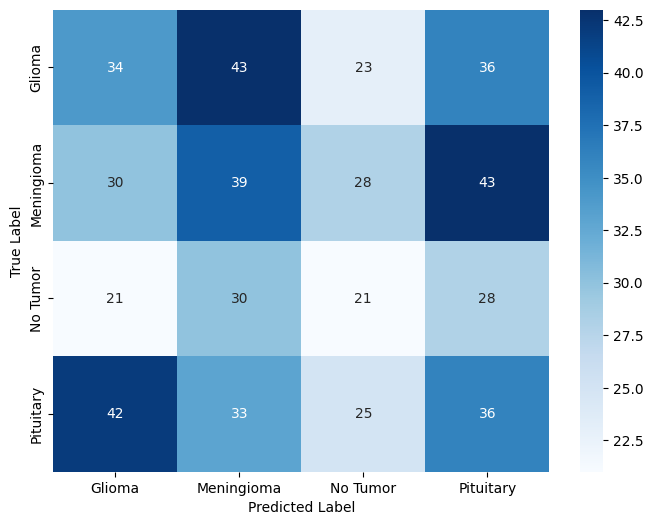

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

# Generate classification report
classes = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=classes))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


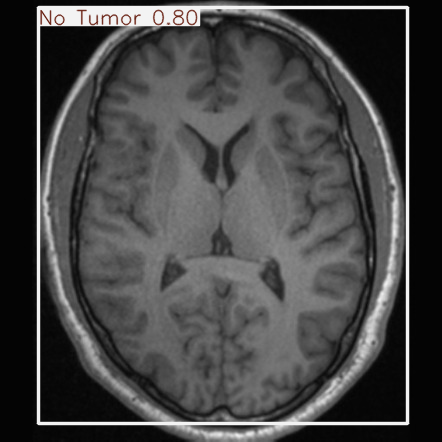

Saved 1 image to yolov5_inference_results3


In [ ]:
import torch

# Load the best YOLOv5 model
model = torch.hub.load('', 'custom', path='runs/train/exp/weights/best.pt', source='local')

# Get a sample image from validation set
import glob
val_images = glob.glob('/content/yolo_data/images/val/*.jpg')
img_path = val_images[0]

# Perform inference on an image
results = model(img_path)

# Display results
results.show()
results.save(save_dir='yolov5_inference_results')

In [ ]:
pip install matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

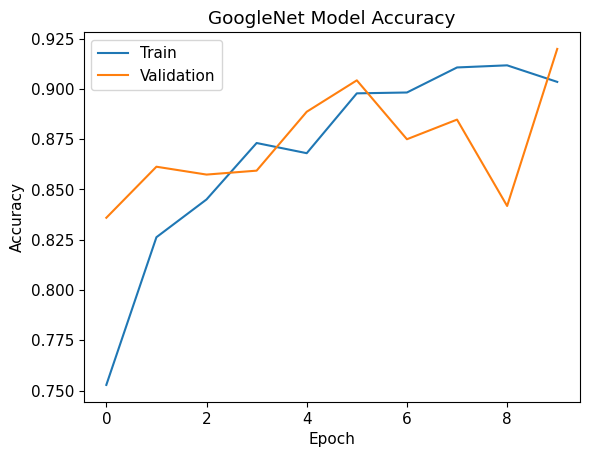

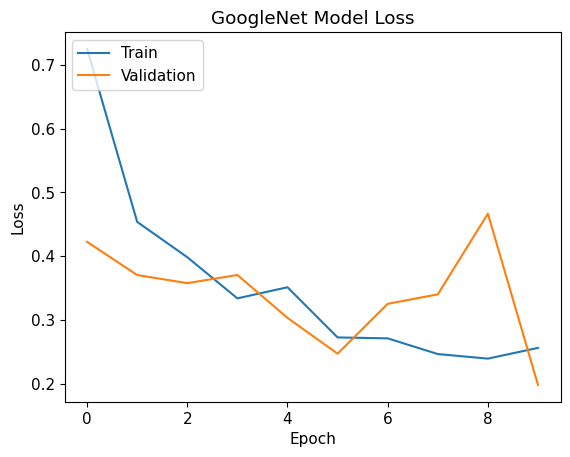

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GoogleNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GoogleNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

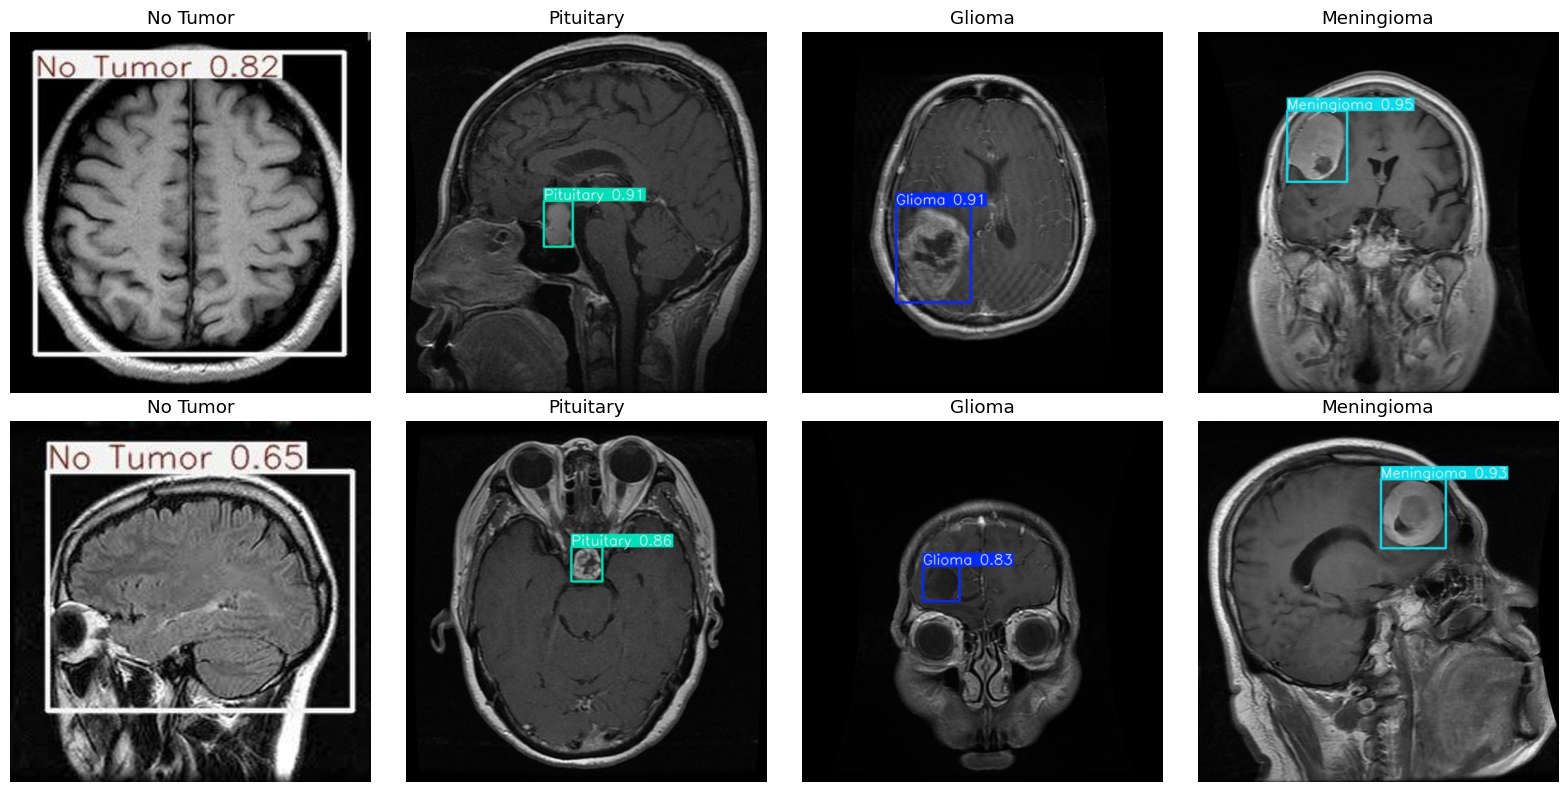

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

image_paths = [
    ('/content/yolov5/yolov5_inference_results15/Tr-no_0328.jpg', 'No Tumor'),
    ('/content/yolov5/yolov5_inference_results20/Tr-pi_0124.jpg', 'Pituitary'),
    ('/content/yolov5/yolov5_inference_results13/Tr-gl_0375.jpg', 'Glioma'),
    ('/content/yolov5/yolov5_inference_results14/Tr-me_0139.jpg', 'Meningioma'),
    ('/content/yolov5/yolov5_inference_results23/Tr-no_0049.jpg', 'No Tumor'),
    ('/content/yolov5/yolov5_inference_results24/Te-pi_0021.jpg', 'Pituitary'),
    ('/content/yolov5/yolov5_inference_results21/Tr-gl_0488.jpg', 'Glioma'),
    ('/content/yolov5/yolov5_inference_results22/Tr-me_1091.jpg', 'Meningioma'),
]

# Set up the plot with a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, (img_path, condition_name) in enumerate(image_paths):
    if not os.path.exists(img_path):
        print(f"Error: {img_path} does not exist.")
        continue

    # Load the image
    img = Image.open(img_path)
    img = img.resize((512, 512))

    # Determine the subplot row and column
    row = i // 4
    col = i % 4

    # Display the image in the subplot
    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(condition_name)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [1]:
!pip install vit-keras -q

In [2]:
!pip install tensorflow==2.15

In [1]:
import os
import numpy as np
import tensorflow as tf
from vit_keras import vit, visualize
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# Parameters
img_size = (224, 224)
batch_size = 32
data_dir = '/content/mri-for-brain-tumor-with-bounding-boxes'

# Function to preprocess images to [-1, 1] for ViT
def vit_preprocess(image, label):
    image = tf.image.resize(image, img_size)
    image = vit.preprocess_inputs(image)
    return image, label

# Load training and validation datasets from the directory structure
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=f"{data_dir}/Train",
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    color_mode='rgb',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=f"{data_dir}/Val",
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    color_mode='rgb',
    shuffle=True
)

# Apply preprocessing function to datasets
train_ds = train_ds.map(vit_preprocess)
val_ds = val_ds.map(vit_preprocess)

# Check dataset structure
print(f"Training Dataset: {train_ds}")
print(f"Validation Dataset: {val_ds}")

Found 4737 files belonging to 4 classes.
Found 512 files belonging to 4 classes.
Training Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [3]:
# Define the ViT model
image_size = 224
vit_base = vit.vit_b32(
    image_size=image_size,
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=4
)

vit_model = Sequential([
    vit_base,
    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='softmax')  # Output layer
])

vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

vit_model.summary()

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 4)                 5

In [4]:
# Train the model
history = vit_model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
)

Epoch 1/50
149/149 [==============================] - 104s 400ms/step - loss: 1.1068 - accuracy: 0.5715 - val_loss: 1.3561 - val_accuracy: 0.4297
Epoch 2/50
149/149 [==============================] - 57s 382ms/step - loss: 0.8317 - accuracy: 0.6882 - val_loss: 1.1222 - val_accuracy: 0.5703
Epoch 3/50
149/149 [==============================] - 61s 405ms/step - loss: 0.6493 - accuracy: 0.7524 - val_loss: 1.3148 - val_accuracy: 0.6035
Epoch 4/50
149/149 [==============================] - 58s 386ms/step - loss: 0.5533 - accuracy: 0.7864 - val_loss: 1.8479 - val_accuracy: 0.3574
Epoch 5/50
149/149 [==============================] - 58s 384ms/step - loss: 0.4570 - accuracy: 0.8265 - val_loss: 0.8775 - val_accuracy: 0.6680
Epoch 6/50
149/149 [==============================] - 58s 385ms/step - loss: 0.3827 - accuracy: 0.8548 - val_loss: 0.8496 - val_accuracy: 0.7578
Epoch 7/50
149/149 [==============================] - 57s 383ms/step - loss: 0.2976 - accuracy: 0.8885 - val_loss: 4.4439 - val_a

16/16 [==============================] - 3s 132ms/step - loss: 1.3308 - accuracy: 0.6992
Validation Loss: 1.3307803869247437, Validation Accuracy: 0.69921875
1/1 [==============================] - 0s 32ms/step


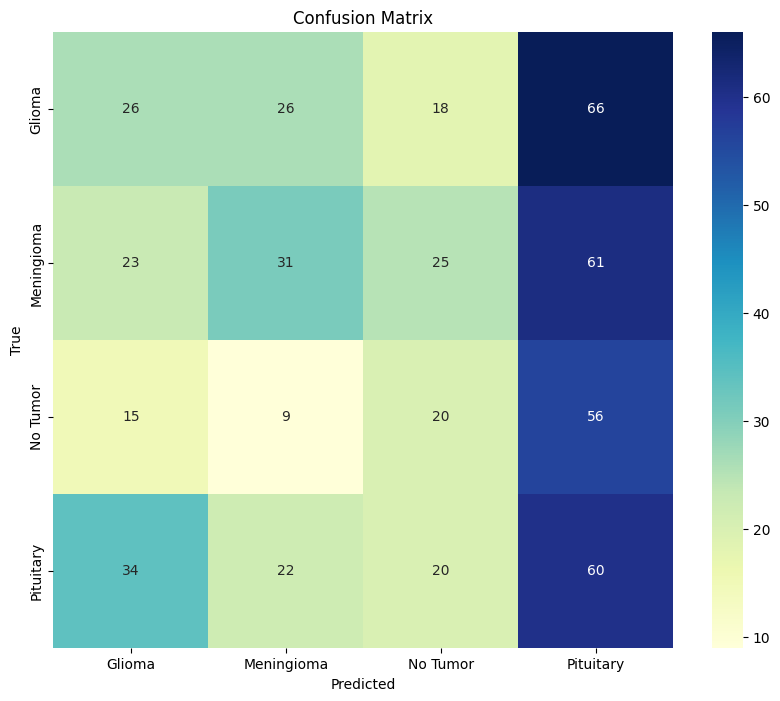

In [9]:
# Evaluate model performance on validation set
val_loss, val_accuracy = vit_model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Predictions and evaluation on validation data
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(np.concatenate([vit_model.predict(x) for x, y in val_ds], axis=0), axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()